In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### the above lines are to specify that changes in our py files are loaded before every execution. helpful if you're modifying preprocessing.

In [4]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import random
import sys


# Importing Preprocessing

- if you code in a .py file, you can just use relative imports.

- otherwise, if you're in a notebook, use the below snippet to import preprocessing.
    - notebooks dont allow relative imports outside of known packages. we're just adding the neccessary directory to our syspath


    - you're going to need to have an \_\_init\_\_.py file in your directory if you want to import

In [5]:
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from Preprocessing.preprocessing import DATA_ROOT, DATA_FOLDERS, DATA_SUBFOLDERS # Some helpful lists for data access.
from Preprocessing.preprocessing import load_labels, image_generator, image_path_generator, batch_generator

In [6]:
# however, notice that our working directory is unchanged. we just added to system path for the above code.
print(os.getcwd())

/Users/KevinLu/Downloads/Parent/MATH4570-final-project-1/Preprocessing


# About the data:
 - Data is stored in the renders file.
 - DATA_FOLDERS is the folders in the renders file.
 - each folder in DATA_FOLDERS is divided into 4 subfolders, which contain images. 
    - Those 4 subfolders have fairly self-explanatory names.

- each image's file name is it's ID. you can map this to the hemorrhage-labels.csv for the true labels for classification

In [7]:
DATA_ROOT

'data'

In [8]:
DATA_FOLDERS

['epidural',
 'intraparenchymal',
 'itroventricular',
 'multi',
 'normal',
 'subarachnoid',
 'subdural']

In [9]:
DATA_SUBFOLDERS

['brain_bone_window', 'brain_window', 'max_contrast_window', 'subdural_window']

In [10]:
# all the folders that data is stored in.
for folder in DATA_FOLDERS:
    for subfolder in DATA_SUBFOLDERS:
        print(f"{DATA_ROOT}/{folder}/{subfolder}")

data/epidural/brain_bone_window
data/epidural/brain_window
data/epidural/max_contrast_window
data/epidural/subdural_window
data/intraparenchymal/brain_bone_window
data/intraparenchymal/brain_window
data/intraparenchymal/max_contrast_window
data/intraparenchymal/subdural_window
data/itroventricular/brain_bone_window
data/itroventricular/brain_window
data/itroventricular/max_contrast_window
data/itroventricular/subdural_window
data/multi/brain_bone_window
data/multi/brain_window
data/multi/max_contrast_window
data/multi/subdural_window
data/normal/brain_bone_window
data/normal/brain_window
data/normal/max_contrast_window
data/normal/subdural_window
data/subarachnoid/brain_bone_window
data/subarachnoid/brain_window
data/subarachnoid/max_contrast_window
data/subarachnoid/subdural_window
data/subdural/brain_bone_window
data/subdural/brain_window
data/subdural/max_contrast_window
data/subdural/subdural_window


# Let's access the hemorrhage-labels.csv file to get our y_true

In [14]:
# you can directly load the data into a csv like this if you really want.
df = pd.read_csv("../../hemorrhage-labels.csv", index_col="Image")
df

,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
Image,,,,,,
ID_000012eaf,0,0,0,0,0,0
ID_000039fa0,0,0,0,0,0,0
ID_00005679d,0,0,0,0,0,0
ID_00008ce3c,0,0,0,0,0,0
ID_0000950d7,0,0,0,0,0,0
...,...,...,...,...,...,...
ID_ffff82e46,0,0,0,0,0,0
ID_ffff922b9,1,0,0,1,0,0
ID_ffffb670a,1,0,0,0,1,0


In [16]:
# but i recommend using this to load the data into a dict. it's simple, quick (for access), and effective.

labels_dict = load_labels("../../hemorrhage-labels.csv")

In [17]:
# get labels by ID. our batch generator will give IDs attached to the images.
labels_dict["ID_ffff82e46"]

{'any': 0,
 'epidural': 0,
 'intraparenchymal': 0,
 'intraventricular': 0,
 'subarachnoid': 0,
 'subdural': 0}

# We'll use Generators to access data. 

 - Image data is total 10-11 GB of data
 - Infeasible to load that into memory for every computer.

 - Generator functions are defined in preprocessing.py in the root directory.

# Ensure that the data is loaded in the correct spots locally

In [18]:
# Should look like _______ MATH4570-final-project-1\Preprocessing
# unzip the contents of the OneDrive folder into the parent directory of the git repo.
# so the 3 files should be renders, dcms (empty), hemhorrage-labels
print(os.getcwd())

/Users/KevinLu/Downloads/Parent/MATH4570-final-project-1/Preprocessing


In [21]:
# generators produce an iterable object, which we use to get data as we use it.
ep_bbw = image_generator("../../data/epidural/brain_bone_window")


In [22]:
# this is how you get samples from the single-generator
sample_img, sample_id = next(ep_bbw)
second_img, second_id = next(ep_bbw)

# Some different ways to visualize a specific RGB image

In [23]:
# Using plotly express for more in-depth imaging.
px.imshow(sample_img, title=sample_id)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: [%{z[0]}, %{z[1]}, %{z[2]}]<extra></extra>',
              'name': '0',
              'source': ('data:image/png;base64,iVBORw0K' ... 'z/5IUrLdaiLCcAAAAASUVORK5CYII='),
              'type': 'image',
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'template': '...',
               'title': {'text': 'ID_bb8f02a19'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

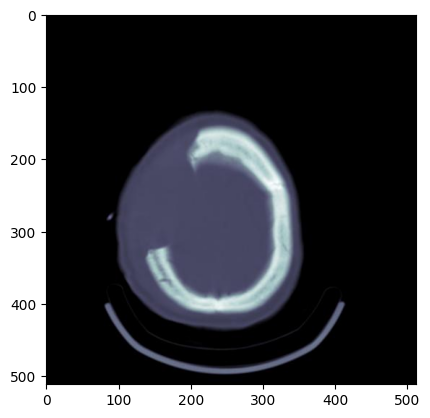

In [24]:
# using matplotlib
plt.imshow(second_img)

# How to use batch generator

- set batch_size to the desired size
- you'll get given increments of data in specific batches. you can then use this however you want!
  - treat each batch as an epoch! etc.

In [27]:
# instantiate batch generator object
# we'll set the size of batches here.

batch_gen = batch_generator('../../data/epidural/max_contrast_window', batch_size=9)

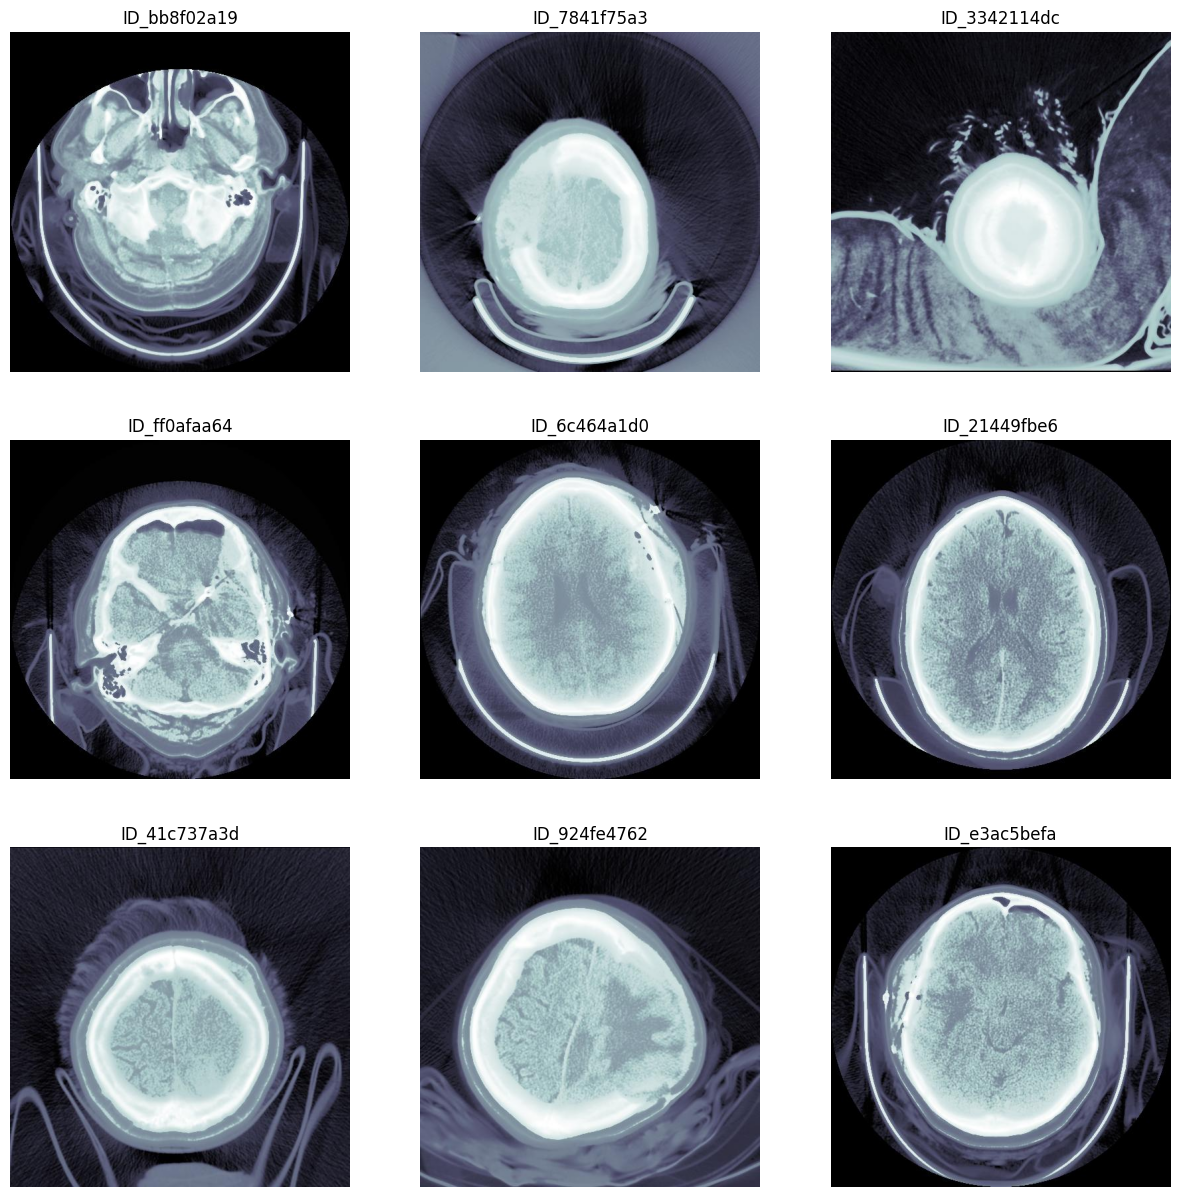

In [28]:
# this is the first batch of 9. If you re-run this code you'll get different results.
images, ids = next(batch_gen)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# you need to ravel if you want to only have one loop layer
axs = axs.ravel()


for i, (img, file_id) in enumerate(zip(images, ids)):
    axs[i].imshow(img)
    axs[i].set_title(file_id)
    axs[i].axis('off')

plt.show()
